In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table


In [2]:
# two test lists just to make quick instances:
s = [ 0, 0, 0, 1, -4, 6, -4, 1, 0, 0, 0]
v = np.linspace(0, 1, len(s))

In [3]:
class HIspectrum:
    """Class for line profile spectra"""
    def __init__(self, filename):
        """Create Spectrum instance from filename with astropy.table.Table"""
        tdata = Table.read(filename)
        self.flux = np.array(tdata['FLUX'])
        self.velo = np.array(tdata['VHELIO'])
        self.freq = np.array(tdata['FREQUENCY'])
        self.blin = np.array(tdata['BASELINE'])
        self.meta = tdata.meta #ordered dict
        self.obname = self.meta['OBJECT']
        self.roi = None #region of interest for data reduction
            
    def display(self, vlim=[None, None], f_name=None, v21=False):
        """plot the Spectrum, vlim is velo limits. If f_name is specified, save figure there."""
        plt.plot(self.velo, self.flux)
        plt.suptitle('Object: {:s}'.format(self.obname))
        plt.xlabel('Velocity')
        plt.ylabel('Flux')
        if v21:
            ctr = self.meta['V21SYS']
            vlim = [ctr-500, ctr+500]  #500 km/s either side
        plt.xlim(vlim)
        if self.roi is not None:
            plt.plot(self.velo[self.roi], self.flux[self.roi], color="red")
            plt.fill_between(self.velo[self.roi], self.flux[self.roi], color='red', alpha=0.2)
        if f_name is not None:
            plt.savefig(f_name)
            
        
    def set_name(self, name):
        """Set the name of the Spectrum object for display"""
        self.obname = name
    def set_roi(self, vr_lo, vr_hi):
        """Set the region of interest for the Spectrum: a numpy fancy index"""
        self.roi = (self.velo > vr_lo) & (self.velo < vr_hi)
        
    def integrate_roi(self):
        """Integrate the Spectrum's region of interest, typically the line profile"""
        if self.roi is not None:
            I = np.trapz(self.flux, self.velo)
            if self.velo[-1] < self.velo[0]: #check for reversed v array
                I = -I
                print("NOTE correcting sum for reversed v axis.")
        else:
            print("Region of interest undefined!")
            I = None
        return I


In [4]:
spect = HIspectrum("A102603.fits")

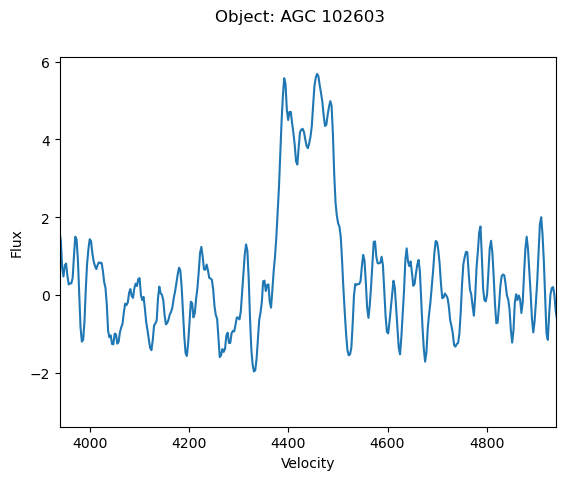

In [5]:
spect.display(v21=True)

In [6]:
spect.set_roi(4350,4550)

negative correction needed because `velo` is decreasing with increasing index

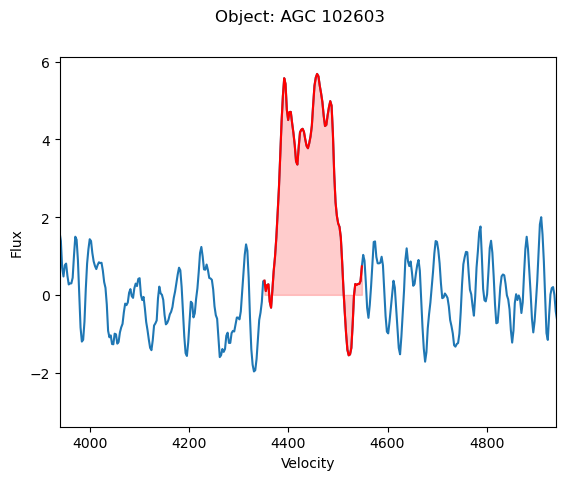

In [7]:
spect.display(v21=True)

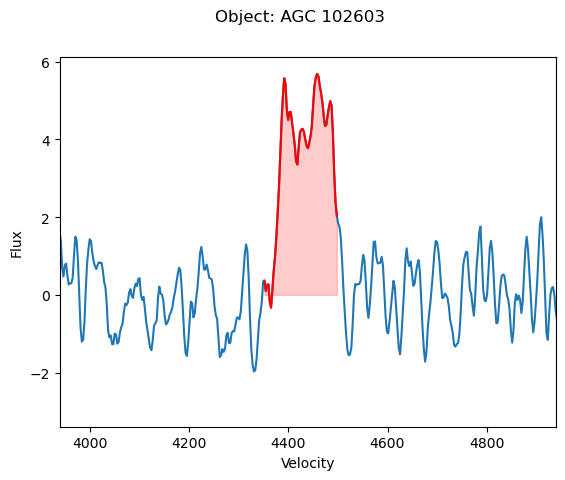

In [8]:
spect.set_roi(4350,4500)
spect.display(v21=True)

In [9]:
spect.integrate_roi()

NOTE correcting sum for reversed v axis.


578.1240848682503